In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import sys
sys.path.append('..')

print("Semiconductor Supply Chain Risk - Data Exploration")

Semiconductor Supply Chain Risk - Data Exploration


In [2]:
# Load your actual collected data
data_dir = Path("../data/raw/financial_data")
csv_files = list(data_dir.glob("financial_risk_indicators_*.csv"))

if csv_files:
    latest_file = max(csv_files, key=lambda f: f.stat().st_mtime)
    df = pd.read_csv(latest_file)
    print(f"Loaded {len(df)} companies from {latest_file.name}")
    df.head()
else:
    print("No data found - run: python src/data_collection/financial_data.py")

Loaded 10 companies from financial_risk_indicators_20250825_223848.csv


In [3]:
# Basic statistics
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nRisk Score Statistics:")
print(df['Financial_Risk_Score'].describe())

# Show highest risk companies
print(f"\nTop 5 Highest Risk Companies:")
top_risk = df.nlargest(5, 'Financial_Risk_Score')[['Company', 'Financial_Risk_Score']]
print(top_risk.to_string(index=False))

Dataset Overview:
Shape: (10, 15)

Risk Score Statistics:
count    10.000000
mean      3.000000
std       1.146977
min       1.000000
25%       2.400000
50%       3.400000
75%       3.800000
max       4.400000
Name: Financial_Risk_Score, dtype: float64

Top 5 Highest Risk Companies:
          Company  Financial_Risk_Score
Applied Materials                   4.4
Texas Instruments                   4.0
              AMD                   3.8
             ASML                   3.8
            Intel                   3.4


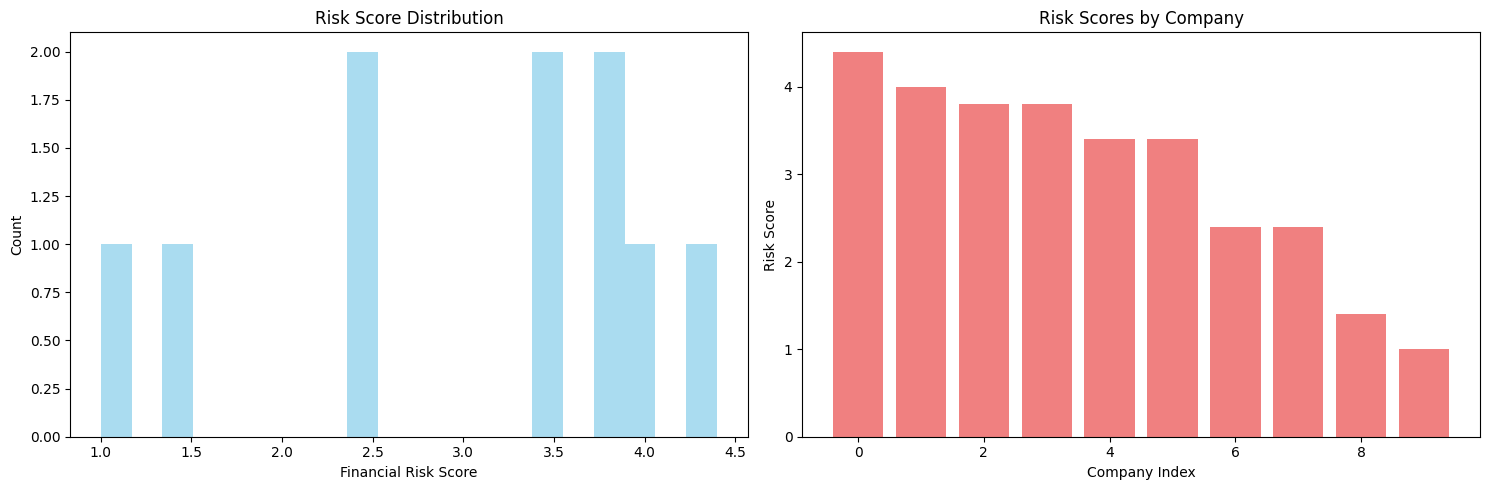

In [4]:
# Risk score distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(df['Financial_Risk_Score'], bins=20, alpha=0.7, color='skyblue')
ax1.set_title('Risk Score Distribution')
ax1.set_xlabel('Financial Risk Score')
ax1.set_ylabel('Count')

# Bar chart by company
df_sorted = df.sort_values('Financial_Risk_Score', ascending=False)
ax2.bar(range(len(df_sorted)), df_sorted['Financial_Risk_Score'], color='lightcoral')
ax2.set_title('Risk Scores by Company')
ax2.set_xlabel('Company Index')
ax2.set_ylabel('Risk Score')

plt.tight_layout()
plt.show()

In [5]:
# Interactive plotly chart
fig = px.bar(df.sort_values('Financial_Risk_Score', ascending=False), 
             x='Company', y='Financial_Risk_Score',
             title='Financial Risk Scores by Company',
             color='Financial_Risk_Score',
             color_continuous_scale='RdYlBu_r')
fig.update_layout(xaxis_tickangle=-45)
fig.show()